In [1]:
import numpy as np
import pandas as pd
from skillmodels.config import TEST_DIR
import yaml
from skillmodels.visualize_transition_equations import visualize_transition_equations
from skillmodels.likelihood_function import get_maximization_inputs

# How to visualize transition equations

The parameter estimates of the transition equations are not always easy to interpret. Instead it is better to look at plots of the transition equations. 

Unfortunately, most transition equations depend on several factors, such that only the dimensionality has to be reduced in order to plot them. We achieve this by one of the following:

1. Fixing all but one factor at one (or several) quantiles and plot how the function varies with the remaining factor. 
2. Average out all but one factor and plot how the function varies with the remaining factor. 

3d Plots are planned but not yet supported. 

Below we show how to visualize transition equations for a test model. 

## Getting filtered states and state_ranges

For more details on this check out the introductory tutorial. 

In [2]:
with open(TEST_DIR / "model2.yaml") as y:
        model_dict = yaml.load(y, Loader=yaml.FullLoader)

params = pd.read_csv(TEST_DIR / "regression_vault" / f"one_stage_anchoring.csv")
params = params.set_index(["category", "period", "name1", "name2"])

data = pd.read_stata(TEST_DIR / "model2_simulated_data.dta")
data.set_index(["caseid", "period"], inplace=True)

In [5]:
max_inputs = get_maximization_inputs(model_dict, data)
# necessary because the saved parameters are outdated and have 
# too many entries. 
params = params.loc[max_inputs["params_template"].index]
debug_loglike = max_inputs["debug_loglike"]
debug_data = debug_loglike(params)
filtered_states = debug_data["filtered_states"]
state_ranges = debug_data["state_ranges"]

## Plot transition equations holding other factors at quantiles

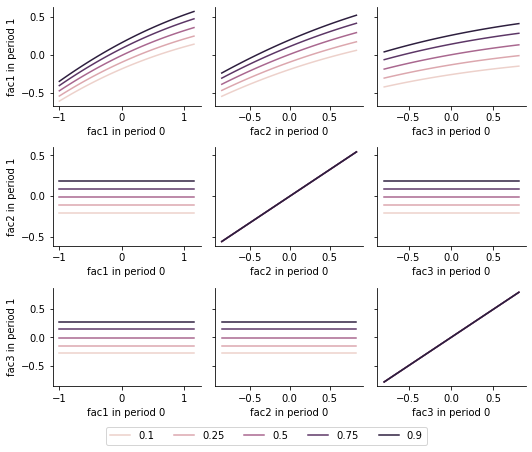

In [6]:
fig = visualize_transition_equations(
    model_dict=model_dict,
    params=params,
    states=filtered_states,
    period=0,
    quantiles_of_other_factors=[0.1, 0.25, 0.5, 0.75, 0.9],
)

## Plot average transition equations

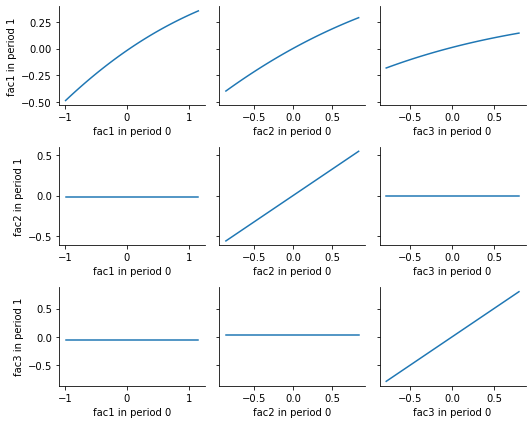

In [8]:
fig = visualize_transition_equations(
    model_dict=model_dict,
    params=params,
    states=filtered_states,
    period=0,
    quantiles_of_other_factors=None,
)